In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from src.classes import Array
from src.plot import plotHM, plotCuts, plotCutsPolar
from src.input import element_array, loadElePattern

# Custom element pattern

In [4]:
# Load data
filename = 'eleRadPattern_example.csv'
path = os.path.join('data', filename)
eleData, freq = loadElePattern(path)
print('Shape of data matrix: ', eleData.shape)
print('Frequencies in data: ', freq)

Shape of data matrix:  (180, 360, 8)
Frequencies in data:  [1427. 1518. 1695. 1950. 2170. 2300. 2500. 2690.]


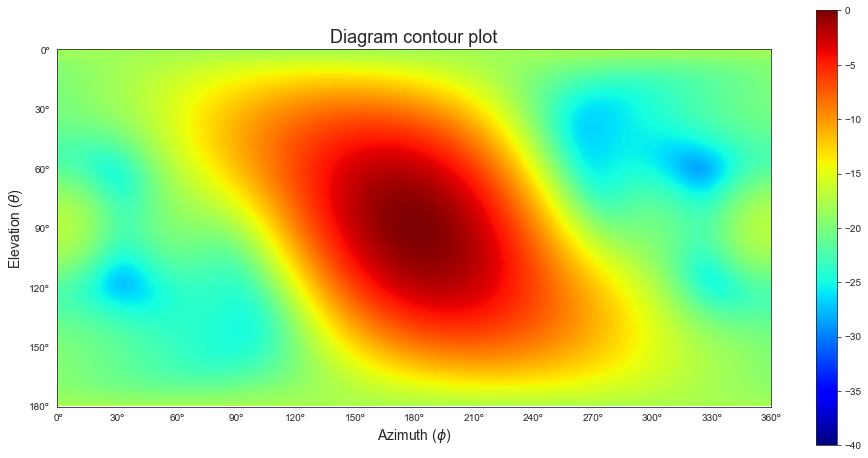

In [5]:
plotHM(eleData[:,:,0])

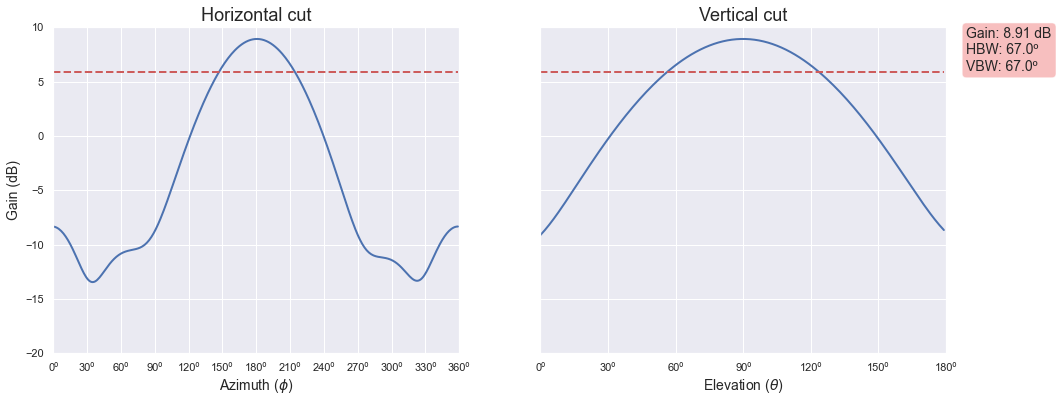

In [6]:
plotCuts(eleData[:,:,0], normalize=False)

# Array with no custom pattern provided

In [7]:
## Make ARRAY
amplitude = [1,1,1.4,1.4,1.8,1.8,1.4,1.4,1,1]
phaseProg = np.deg2rad(-12)
phase = [phaseProg*i for i in range(10)]

sep = 0.120
xpos = [0 for _ in range(10)]
ypos = [0 for _ in range(10)]
zpos = [sep*i for i in range(10)]

# Create array of elements
elements = element_array(xpos, ypos, zpos, amplitude, phase)

# Create Array object and print object
array1 = Array(elements)
print(array1)

#0: 1∠-0.0º @ [0 0 0.0]
#1: 1∠-0.21º @ [0 0 0.12]
#2: 1.4∠-0.42º @ [0 0 0.24]
#3: 1.4∠-0.63º @ [0 0 0.36]
#4: 1.8∠-0.84º @ [0 0 0.48]
#5: 1.8∠-1.05º @ [0 0 0.6]
#6: 1.4∠-1.26º @ [0 0 0.72]
#7: 1.4∠-1.47º @ [0 0 0.84]
#8: 1∠-1.68º @ [0 0 0.96]
#9: 1∠-1.88º @ [0 0 1.08]



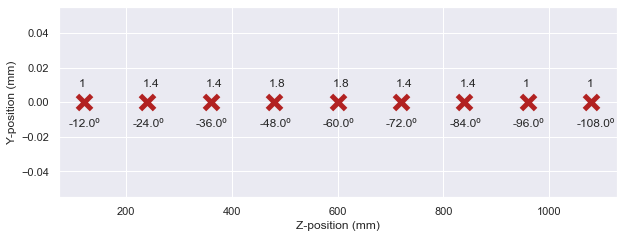

In [8]:
# Plot array elements
array1.plotArray()

We can access a particular array element and check the length of the array

In [9]:
print('Element #5: ', array1[5])
print('Amplitude of element #5: ', array1[5].amplitude)
print('Length of the array:', len(array1))

Element #5:  1.8∠-1.05º @ [0 0 0.6]
Amplitude of element #5:  1.8
Length of the array: 10


We can also iterate through the array of elements

In [8]:
for i, ele in enumerate(array1):
    print(f'Element #{i}:', ele)

Element #0: 1∠-0.0º @ [0 0 0.0]
Element #1: 1∠-0.21º @ [0 0 0.12]
Element #2: 1.4∠-0.42º @ [0 0 0.24]
Element #3: 1.4∠-0.63º @ [0 0 0.36]
Element #4: 1.8∠-0.84º @ [0 0 0.48]
Element #5: 1.8∠-1.05º @ [0 0 0.6]
Element #6: 1.4∠-1.26º @ [0 0 0.72]
Element #7: 1.4∠-1.47º @ [0 0 0.84]
Element #8: 1∠-1.68º @ [0 0 0.96]
Element #9: 1∠-1.88º @ [0 0 1.08]


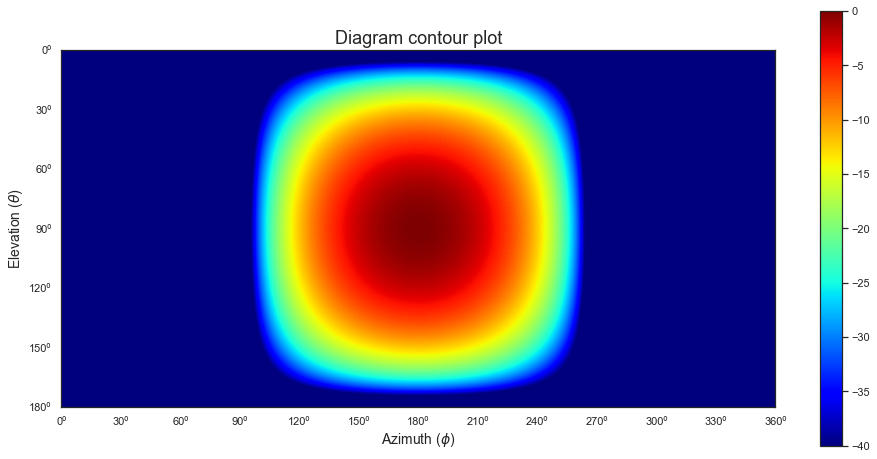

In [9]:
# Plot element pattern
plotHM(array1.elePattern)

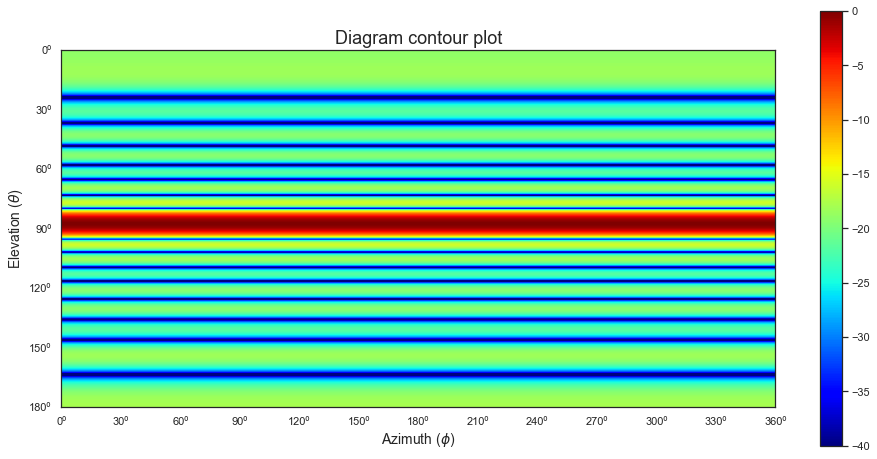

In [10]:
# Plot array factor
plotHM(array1.arrayFactor(2e9))

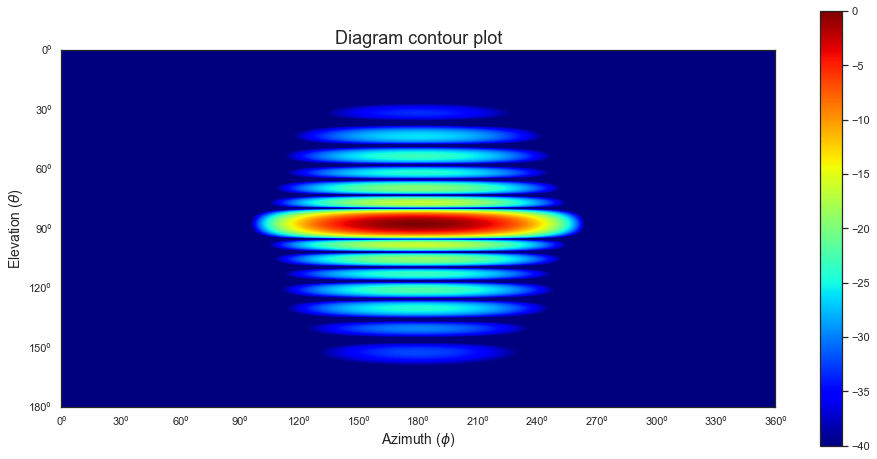

In [11]:
# Plot array pattern
plotHM(array1.arrayPattern(2e9), normalize=True)

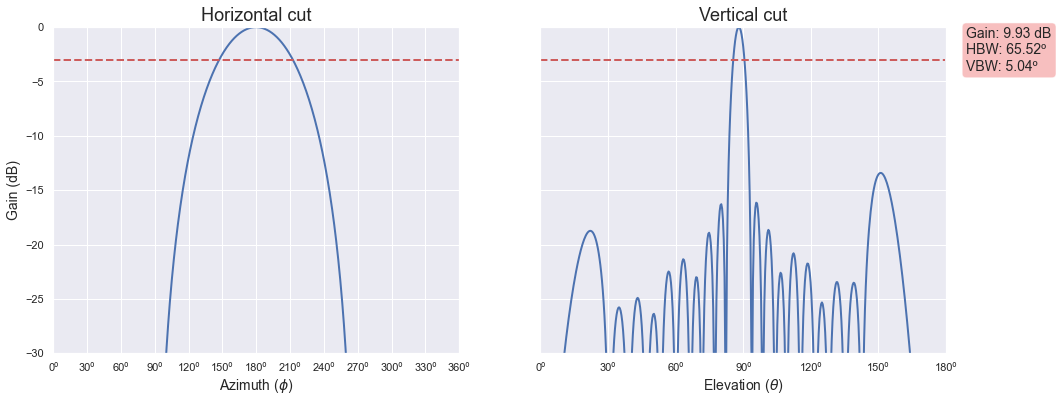

In [12]:
# Plot array pattern cuts @2690MHz
plotCuts(array1.arrayPattern(2.69e9), normalize=True)

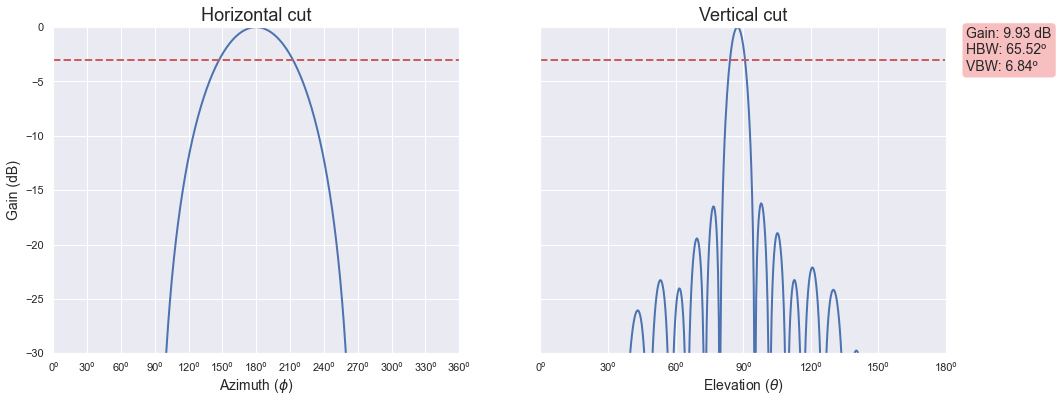

In [13]:
# Plot array pattern cuts @2000MHz
plotCuts(array1.arrayPattern(2e9), normalize=True)

# Array with custom element pattern

In [14]:
# Create Array object. We use element pattern from first frequency (0)
array2 = Array(elements, eleData[:,:,0])
print(array2)
print('Original element pattern size: ', eleData[:,:,0].shape)
print('Element pattern size: ', array2.elePattern.shape)

#0: 1∠-0.0º @ [0 0 0.0]
#1: 1∠-0.21º @ [0 0 0.12]
#2: 1.4∠-0.42º @ [0 0 0.24]
#3: 1.4∠-0.63º @ [0 0 0.36]
#4: 1.8∠-0.84º @ [0 0 0.48]
#5: 1.8∠-1.05º @ [0 0 0.6]
#6: 1.4∠-1.26º @ [0 0 0.72]
#7: 1.4∠-1.47º @ [0 0 0.84]
#8: 1∠-1.68º @ [0 0 0.96]
#9: 1∠-1.88º @ [0 0 1.08]

Original element pattern size:  (180, 360)
Element pattern size:  (500, 1000)


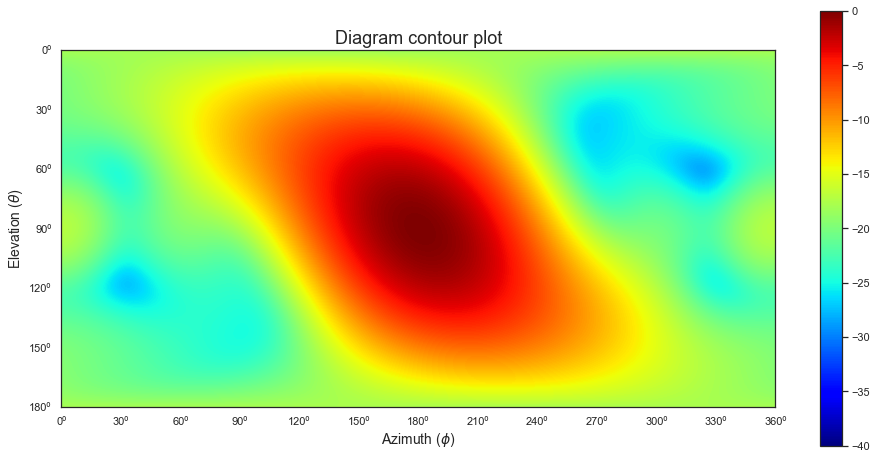

In [15]:
# Plots pattern
plotHM(array2.elePattern)

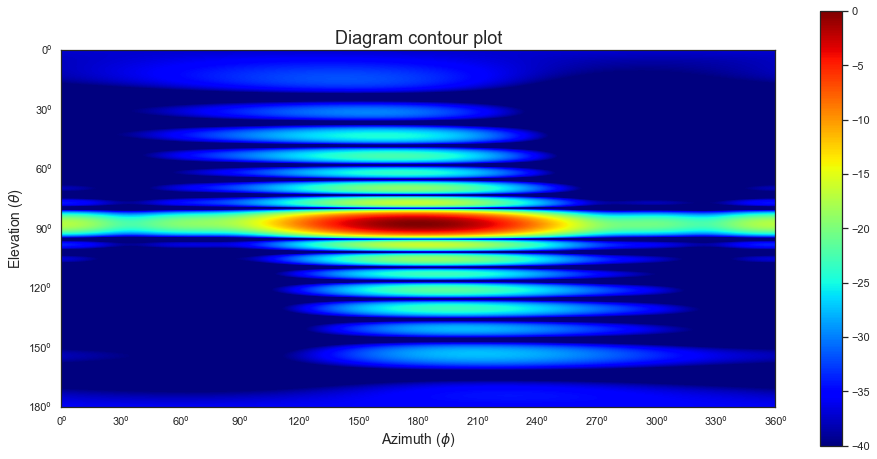

In [16]:
# Plot array pattern
plotHM(array2.arrayPattern(2e9), normalize=True)

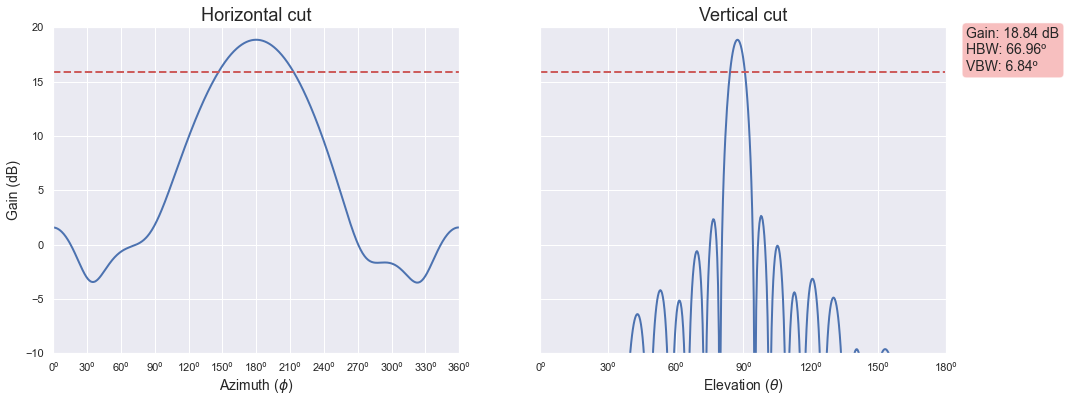

In [17]:
# Plot array pattern cuts
plotCuts(array2.arrayPattern(2e9), normalize=False)

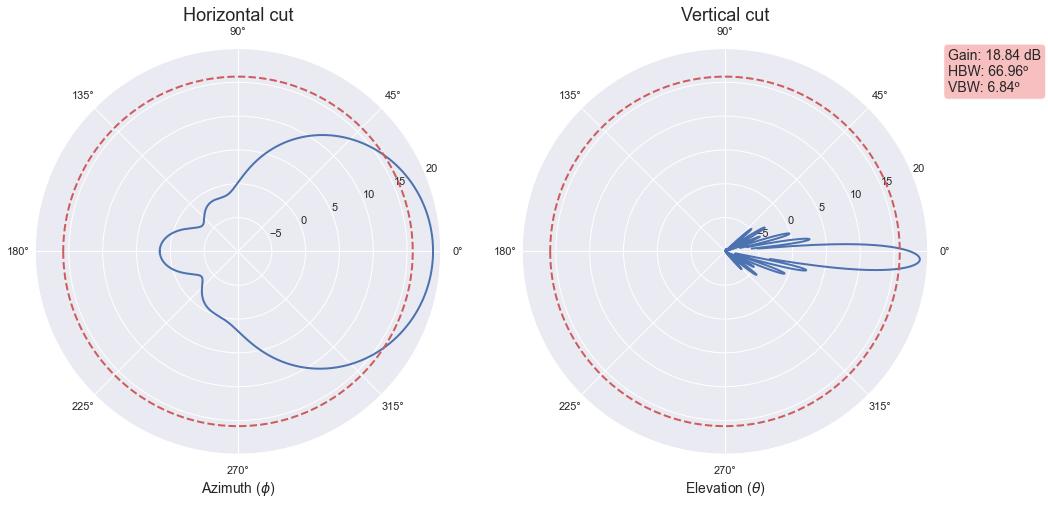

In [18]:
# Plot array pattern cuts - polar coordinates
plotCutsPolar(array2.arrayPattern(2e9), normalize=False)

# Phased array

[1∠-0.0º @ [0 0 0.0], 1∠-1.05º @ [0 0 0.12], 1.4∠-2.09º @ [0 0 0.24], 1.4∠-3.14º @ [0 0 0.36], 1.8∠-4.19º @ [0 0 0.48], 1.8∠-5.24º @ [0 0 0.6], 1.4∠-6.28º @ [0 0 0.72], 1.4∠-7.33º @ [0 0 0.84], 1∠-8.38º @ [0 0 0.96], 1∠-9.42º @ [0 0 1.08]]
#0: 1∠-0.0º @ [0 0 0.0]
#1: 1∠-1.05º @ [0 0 0.12]
#2: 1.4∠-2.09º @ [0 0 0.24]
#3: 1.4∠-3.14º @ [0 0 0.36]
#4: 1.8∠-4.19º @ [0 0 0.48]
#5: 1.8∠-5.24º @ [0 0 0.6]
#6: 1.4∠-6.28º @ [0 0 0.72]
#7: 1.4∠-7.33º @ [0 0 0.84]
#8: 1∠-8.38º @ [0 0 0.96]
#9: 1∠-9.42º @ [0 0 1.08]



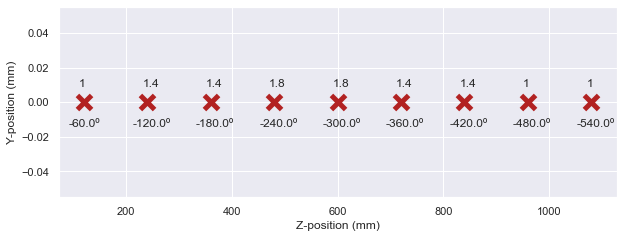

In [19]:
## Make ARRAY
amplitude = [1,1,1.4,1.4,1.8,1.8,1.4,1.4,1,1]
phaseProg = np.deg2rad(-60) # Phase progression
phase = [phaseProg*i for i in range(10)]

sep = 0.120
xpos = [0 for _ in range(10)]
ypos = [0 for _ in range(10)]
zpos = [sep*i for i in range(10)]

# Create array of elements
elements3 = element_array(xpos, ypos, zpos, amplitude, phase)
print(elements3)

# Create Array object
array3 = Array(elements3, eleData[:,:,0])
print(array3)

# Plot array elements
array3.plotArray()

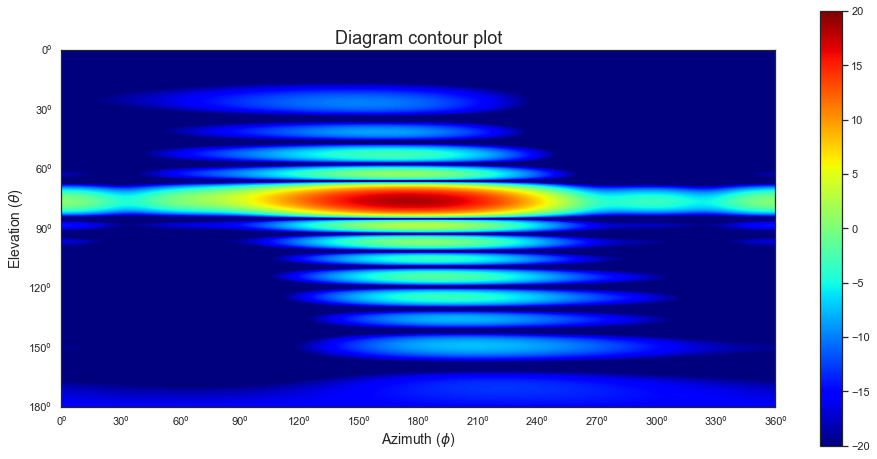

In [20]:
# Plot array factor
plotHM(array3.arrayPattern(1695e6), normalize=False)

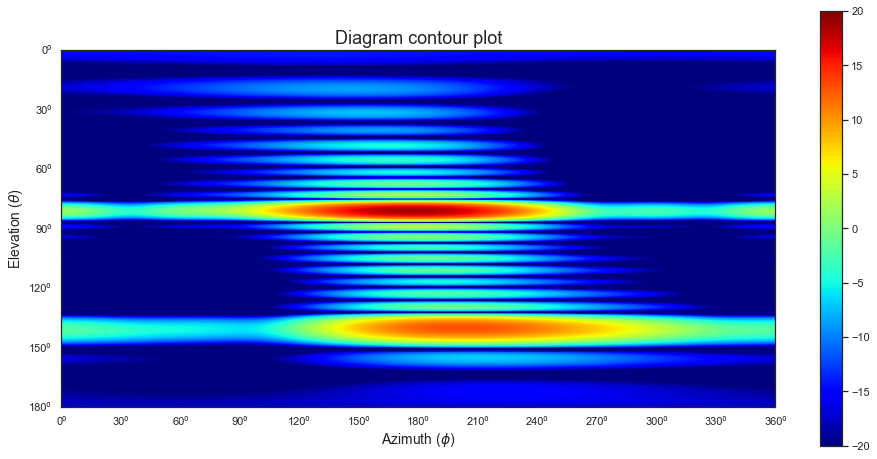

In [21]:
# Plot array factor
plotHM(array3.arrayPattern(2690e6), normalize=False)

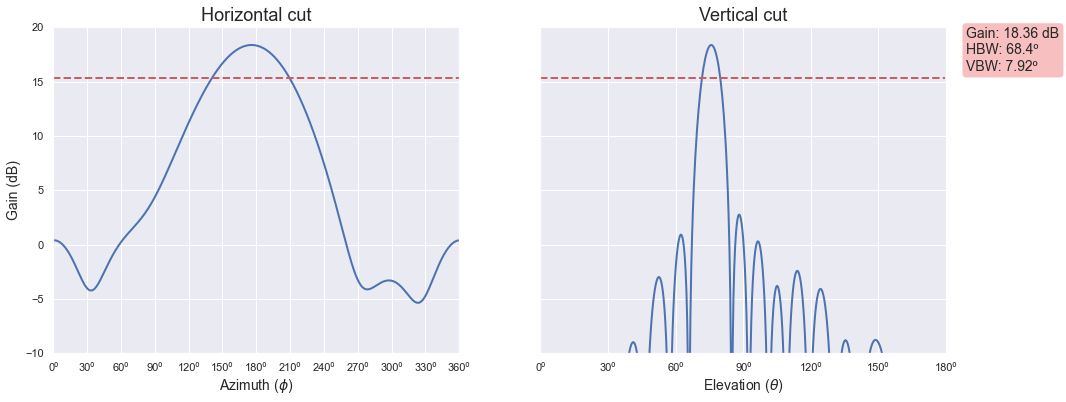

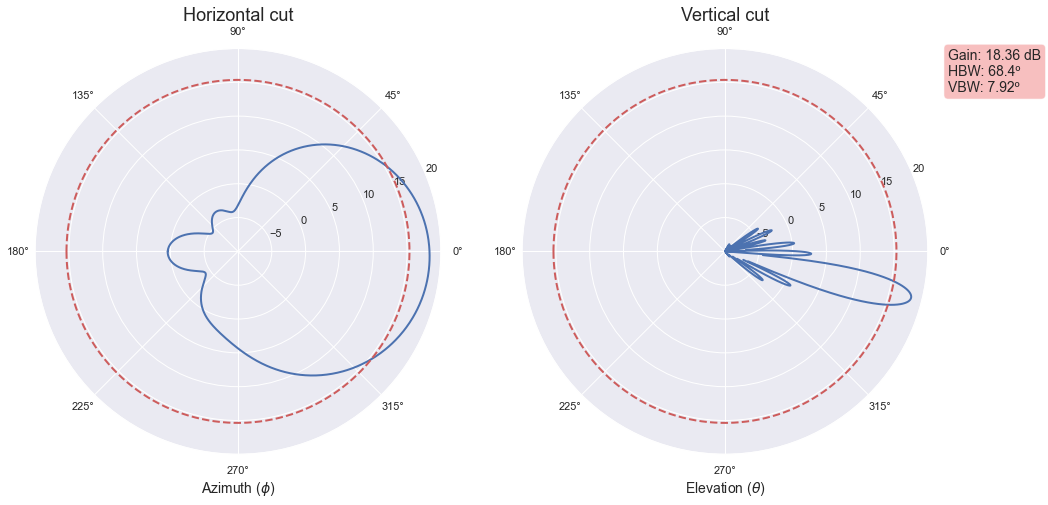

In [22]:
# Plot array pattern cuts @ 1695MHz
plotCuts(array3.arrayPattern(1695e6), normalize=False)
plotCutsPolar(array3.arrayPattern(1695e6), normalize=False)

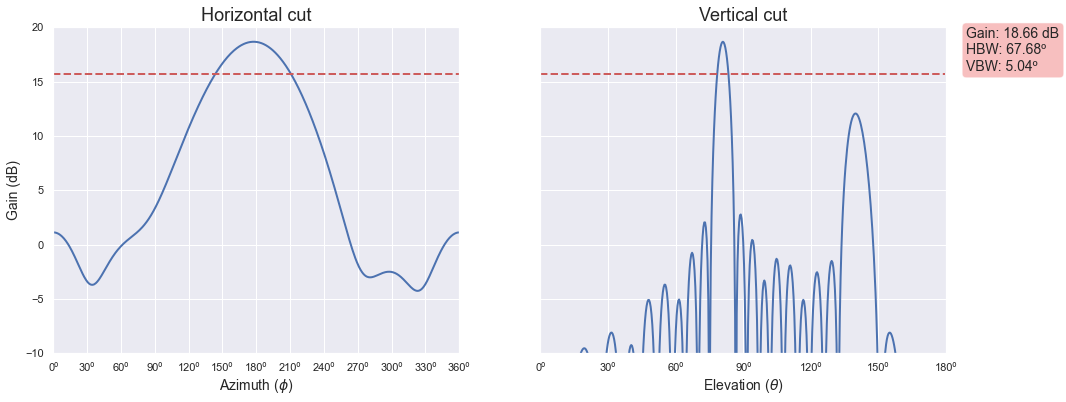

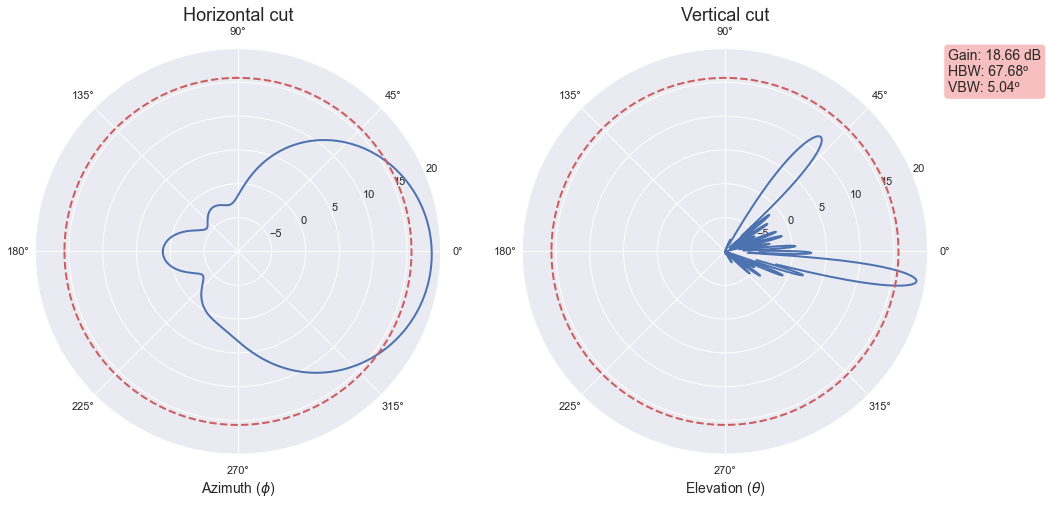

In [23]:
# Plot array pattern cuts @ 2690MHz
plotCuts(array3.arrayPattern(2690e6), normalize=False)
plotCutsPolar(array3.arrayPattern(2690e6), normalize=False)

# Array size comparative

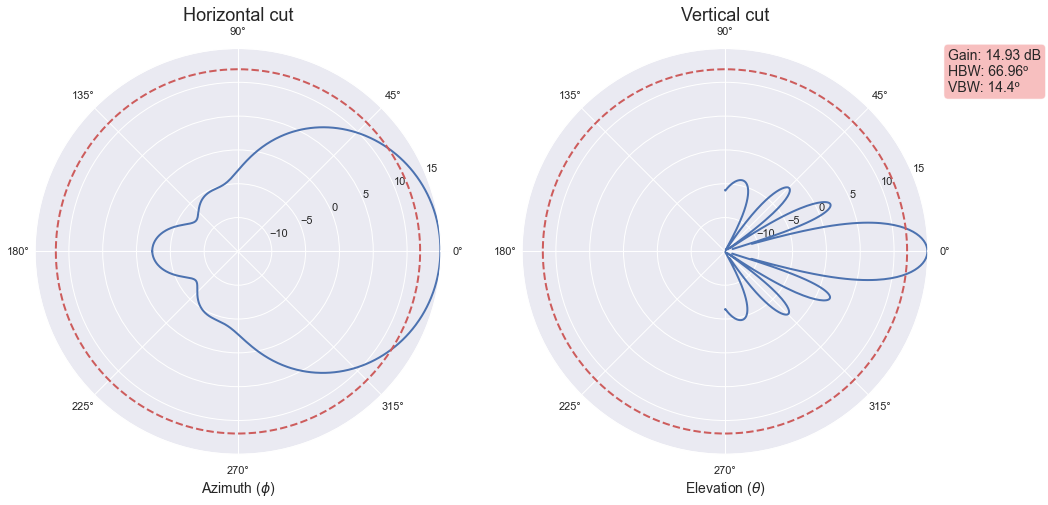

In [24]:
## Make ARRAY
nElements = 4
amplitude = [1 for _ in range(nElements)]
phaseProg = 0 # Phase progression
phase = [phaseProg*i for i in range(nElements)]

sep = 0.120
xpos = [0 for _ in range(nElements)]
ypos = [0 for _ in range(nElements)]
zpos = [sep*i for i in range(nElements)]

# Create array of elements
elements4 = element_array(xpos, ypos, zpos, amplitude, phase)

# Create Array object
array4 = Array(elements4, eleData[:,:,0])


plotCutsPolar(array4.arrayPattern(2200e6), normalize=False)

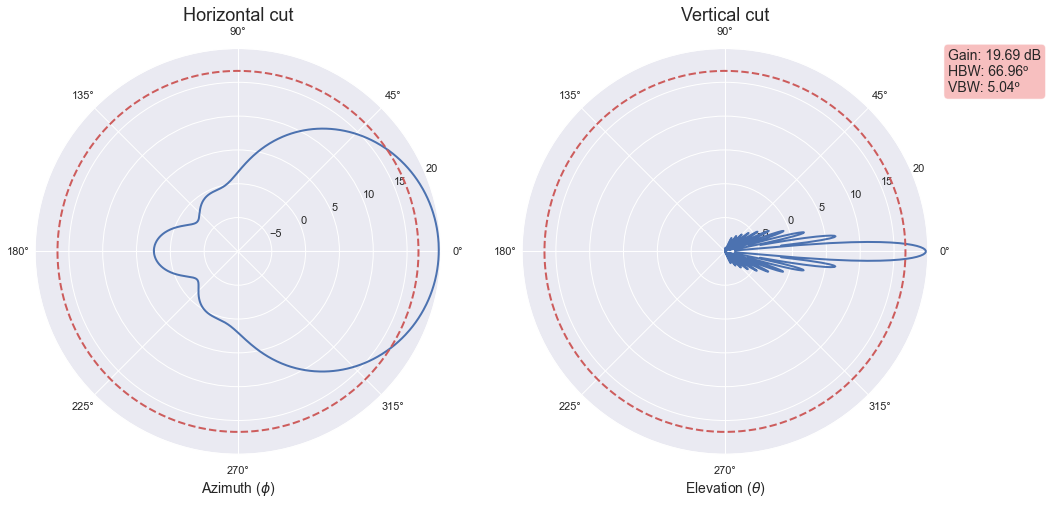

In [25]:
## Make ARRAY
nElements = 12
amplitude = [1 for _ in range(nElements)]
phaseProg = 0 # Phase progression
phase = [phaseProg*i for i in range(nElements)]

sep = 0.120
xpos = [0 for _ in range(nElements)]
ypos = [0 for _ in range(nElements)]
zpos = [sep*i for i in range(nElements)]

# Create array of elements
elements5 = element_array(xpos, ypos, zpos, amplitude, phase)

# Create Array object
array5 = Array(elements5, eleData[:,:,0])

plotCutsPolar(array5.arrayPattern(2200e6), normalize=False)